In [1]:
# Import necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
# Load the datasets
calories_df = pd.read_csv("datasets/calories.csv")
exercise_df = pd.read_csv("datasets/exercise.csv")

In [3]:
# Combine the dataframes
df = pd.concat([exercise_df, calories_df["Calories"]], axis=1)

In [4]:
# Convert categorical values
df.replace({"Gender": {"male": 0, "female": 1}}, inplace=True)

C:\Users\sayan\AppData\Local\Temp\ipykernel_15204\12086051.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Gender": {"male": 0, "female": 1}}, inplace=True)


In [5]:
# Split into features and target
X = df.drop(columns=["User_ID", "Calories"], axis=1)
Y = df["Calories"]

In [6]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
# Bagging Regressor with Decision Tree
bag_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=8),
    n_estimators=100,
    random_state=42,
    bootstrap=True
)

In [23]:
# Train the model
bag_model.fit(X_train, Y_train)

,estimator,DecisionTreeR...r(max_depth=8)
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [24]:
# Predictions
Y_pred = bag_model.predict(X_test)

In [25]:
# Evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

In [27]:
print("📊 Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

📊 Model Evaluation Metrics:
Mean Absolute Error (MAE): 3.23
Mean Squared Error (MSE): 21.49
Root Mean Squared Error (RMSE): 4.64
R² Score: 0.9945


In [14]:
import matplotlib.pyplot as plt

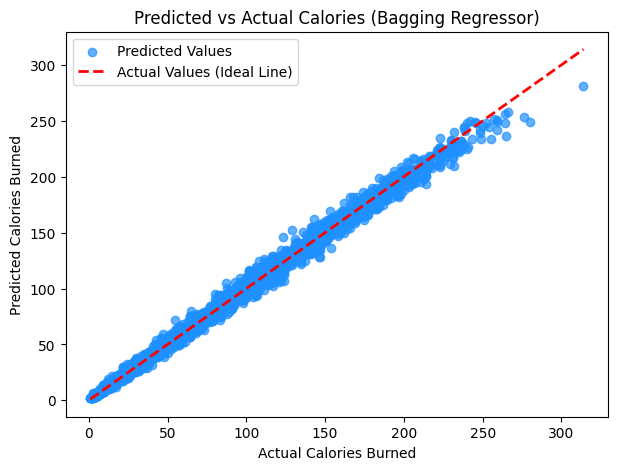

In [28]:
# --- Visualization 1: Predicted vs Actual ---
plt.figure(figsize=(7,5))
plt.scatter(Y_test, Y_pred, color='dodgerblue', alpha=0.7, label='Predicted Values')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Actual Values (Ideal Line)')
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Predicted vs Actual Calories (Bagging Regressor)")
plt.legend()
plt.show()

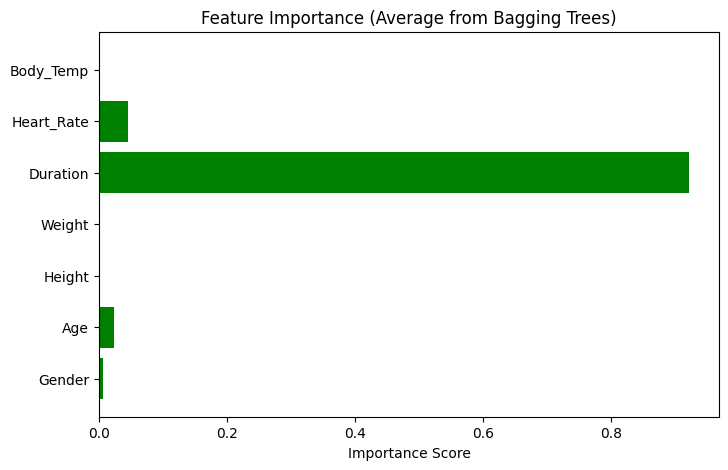

In [29]:
# --- Visualization 3: Feature Importance (optional) ---
if hasattr(bag_model, 'estimators_'):
    feature_importance = np.mean([
        tree.feature_importances_ for tree in bag_model.estimators_
    ], axis=0)

    plt.figure(figsize=(8,5))
    plt.barh(X.columns, feature_importance, color='green')
    plt.title("Feature Importance (Average from Bagging Trees)")
    plt.xlabel("Importance Score")
    plt.show()